# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.


- I have chosen a controlled environment, the main reason for choosing it is because the wealth of images downloaded previously on kaggle. I would like to use ~500/6000 of the training data images to train my own dataset. 

- I first sorted the data in the following code blocks locally. Then uploaded the organized folders to google drive to be used to train the model over colab. 

In [ ]:
## LOCALLY RUN - CODE PULLED FROM LAB4 ALTERED SLIGHTLY
import os
from fastai.vision.all import *
from fastbook import * #imports get_image_files_sorted()

path = "kaggle_training_set/ALL"

digit_list = ['one', 'two', 'three', 'four', 'five']

for digit in digit_list:
    if not os.path.exists(f"kaggle_training_set/{digit}"):
        os.mkdir(f"kaggle_training_set/{digit}")

## start by filtering all the data into correct subfolders ## JUST USING TEST DATA NOT TRAIN FOLDER (BOTH DOWNLOADED)
for image_name in os.listdir(path):
    if image_name.endswith('.png') or image_name.endswith('.jpg'):
        image_path = f'{path}/{image_name}'
        if int(image_path[-6]) == 0:
            os.remove(image_path) ## remove any 0 digits from production data
        else:
            index = int(image_name[-6]) - 1
            # print(f'{digit_list[index]}, {image_name[-6]}') ## sanity check to see if images are characterized correctly

            ## move images into respective subfolders
            subfolder = f'kaggle_training_set/{digit_list[index]}' 
            #print(f'{subfolder}, {image_name[-6]}') ## another sanity check

            new_image_path = os.path.join(subfolder, os.path.basename(image_path))

            os.rename(image_path, new_image_path) ##move all the data!

# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [1]:
# IN COLAB
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks')
export_path.ls()

(#5) [Path('/content/gdrive/MyDrive/Colab Notebooks/lotus_roadster_ddg_23'),Path('/content/gdrive/MyDrive/Colab Notebooks/lotus_tesla_ddg_23'),Path('/content/gdrive/MyDrive/Colab Notebooks/digits'),Path('/content/gdrive/MyDrive/Colab Notebooks/models'),Path('/content/gdrive/MyDrive/Colab Notebooks/digits_2')]

In [5]:
set_seed(82,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=82),
                 get_y=parent_label,
                 item_tfms=Resize(420),
                 batch_tfms=aug_transforms(size=224, min_scale=2, mult=0.3))
dls = digits.dataloaders(export_path/'digits_2')

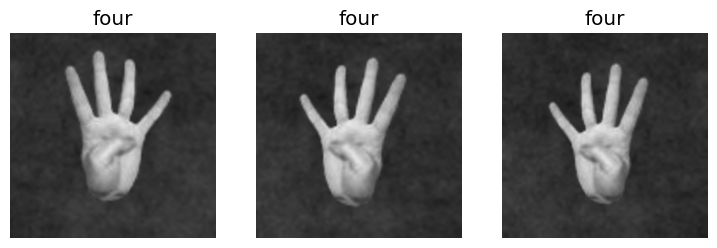

In [6]:
dls.train.show_batch(nrows=1, ncols=3, unique=True)

In [7]:
set_seed(82,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=82),
                 get_y=parent_label,
                 item_tfms=Resize(420),
                 batch_tfms=aug_transforms(size=224, min_scale=2, mult=0.3))
dls = digits.dataloaders(export_path/'digits_2')

learn = vision_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.3MB/s]


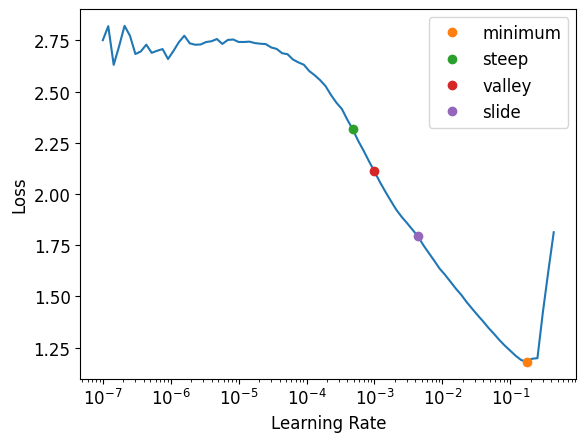

In [8]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide)) #find the ideal learning rate

In [9]:
set_seed(82,True)
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=82),
                 get_y=parent_label,
                 item_tfms=Resize(420),
                 batch_tfms=aug_transforms(size=224, min_scale=2, mult=0.3))
dls = digits.dataloaders(export_path/'digits_2/train_valid')

learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(15, base_lr=lr_slide) #chose lr_slide based on graph above

epoch,train_loss,valid_loss,accuracy,time
0,1.960633,1.501298,0.593333,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.675168,0.679026,0.800000,00:03
1,0.518173,0.417962,0.880000,00:03
2,0.425785,0.521948,0.886667,00:03
3,0.352707,0.589268,0.873333,00:03
4,0.307525,0.456121,0.906667,00:03
5,0.275038,0.459461,0.880000,00:03
6,0.229406,0.572955,0.880000,00:03
7,0.196390,0.875794,0.886667,00:03
8,0.165542,0.364575,0.913333,00:03
9,0.140760,0.301870,0.933333,00:03


In [10]:
learn.export(fname=(export_path/"models/digits_2_model_23-04-12.pkl"))
learn.path = export_path/"models"
learn.save("digits_2_model_23-04-12.pkl")

Path('/content/gdrive/MyDrive/Colab Notebooks/models/models/digits_2_model_23-04-12.pkl.pth')

In [11]:
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=82),
                 get_y=parent_label,
                 item_tfms=Resize(420),
                 batch_tfms=aug_transforms(size=224, min_scale=2, mult=0.3))
dls = digits.dataloaders(export_path/'digits_2/test')

learn_exported = load_learner(export_path/"models/digits_2_model_23-04-12.pkl")
learn_exported.dls.vocab

['five', 'four', 'one', 'three', 'two']

In [14]:
preds, _ = learn_exported.get_preds(dl=dls.valid)

In [15]:
predicted_classes = preds.argmax(dim=1)

In [21]:
## save predicted class, true class, and file name in CSV

#make them all arrays
valid_items = np.array(dls.valid.items)

true_class = []
for x in list(dls.valid.items): #create true class list
    true_class.append((str(x)[-6]))

pred_class = predicted_classes.numpy() 
remap_dict = {2: 1, 0: 5, 1: 4, 3: 3} #remap because folders aren't in order
pred_class = np.vectorize(remap_dict.get)(pred_class)

In [22]:
results_data = list(zip(true_class, pred_class, valid_items))
df = pd.DataFrame(results_data, columns=['True','Predicted','File Name'])

In [23]:
df

,True,Predicted,File Name
0,3,3,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/three/1c8dfa33-9786-4734-a3b8-10275f44dc8f_3R.png
1,1,1,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/one/14ab93c6-e63e-4db9-8b63-92f9332a8490_1R.png
2,3,3,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/three/a7594109-24f5-49dd-98e8-4222c9ea09e2_3L.png
3,5,5,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/five/0c83eeb9-adf7-4294-a3ff-e49744bc11ee_5L.png
4,4,4,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/four/2788e479-5fc1-4140-b80a-63117ea8a1aa_4L.png
...,...,...,...
453,5,5,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/five/98466a7c-37da-4681-b02c-4f64ed69192f_5L.png
454,1,1,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/one/afbd31f8-d027-4645-89c9-d32f81c98c80_1L.png
455,5,5,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/five/dc61d0c4-94db-4b42-aec1-a67396e4ff80_5L.png
456,4,4,/content/gdrive/MyDrive/Colab Notebooks/digits_2/test/four/d864c52d-64c0-4bf9-baf0-3af29ba4aef4_4R.png


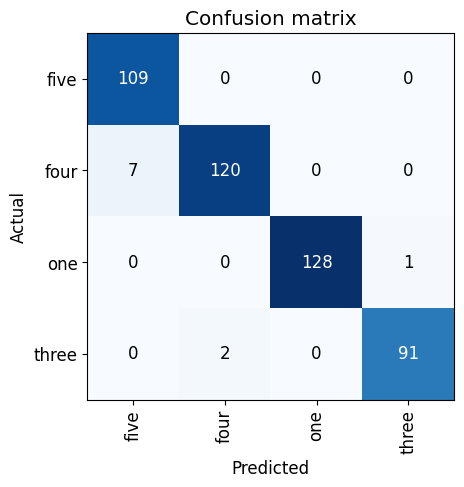

In [24]:
interp = ClassificationInterpretation.from_learner(learn_exported, dl=dls.valid)
interp.plot_confusion_matrix()

In [32]:
## from confusion matrix there are 10 errors out of 458
accuracy = 448/458 * 100

print(f"accuracy of the heavily trained model: {accuracy:0.2f}%")

accuracy of the heavily trained model: 97.82%


# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

* Lab3 Model Accuracy: 84%
* Lab4 Model Accuracy 50%
* **New Model Accuracy: 97.8%**

My new model had much better results in during the final test dataset.

I believe that this model performed so much better because this model was trained on data more similar to what I had used as the test data set. That is full black and white images without any arms just a hand. I also provided much more data for the model to be trained on.

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

I enjoyed looking back at my previous work and kind of carrying a project along throughout the lab sections. I found it challenging using google colab and integrating that with my image data, but enjoyed it and understand that this is an extremely useful tool if I would like to do my own learning.

If I had alotted more time for this assignment, I would create a large variance of training images. Distorting colors wildly and would really like to just throw tons of datasets from Kaggle for training, validation, and final performance testing.

